LADDAR OCH INSPEKTERAR DATA
✓ Data inläst: 20640 rader, 10 kolumner

Första 5 raderna:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0       

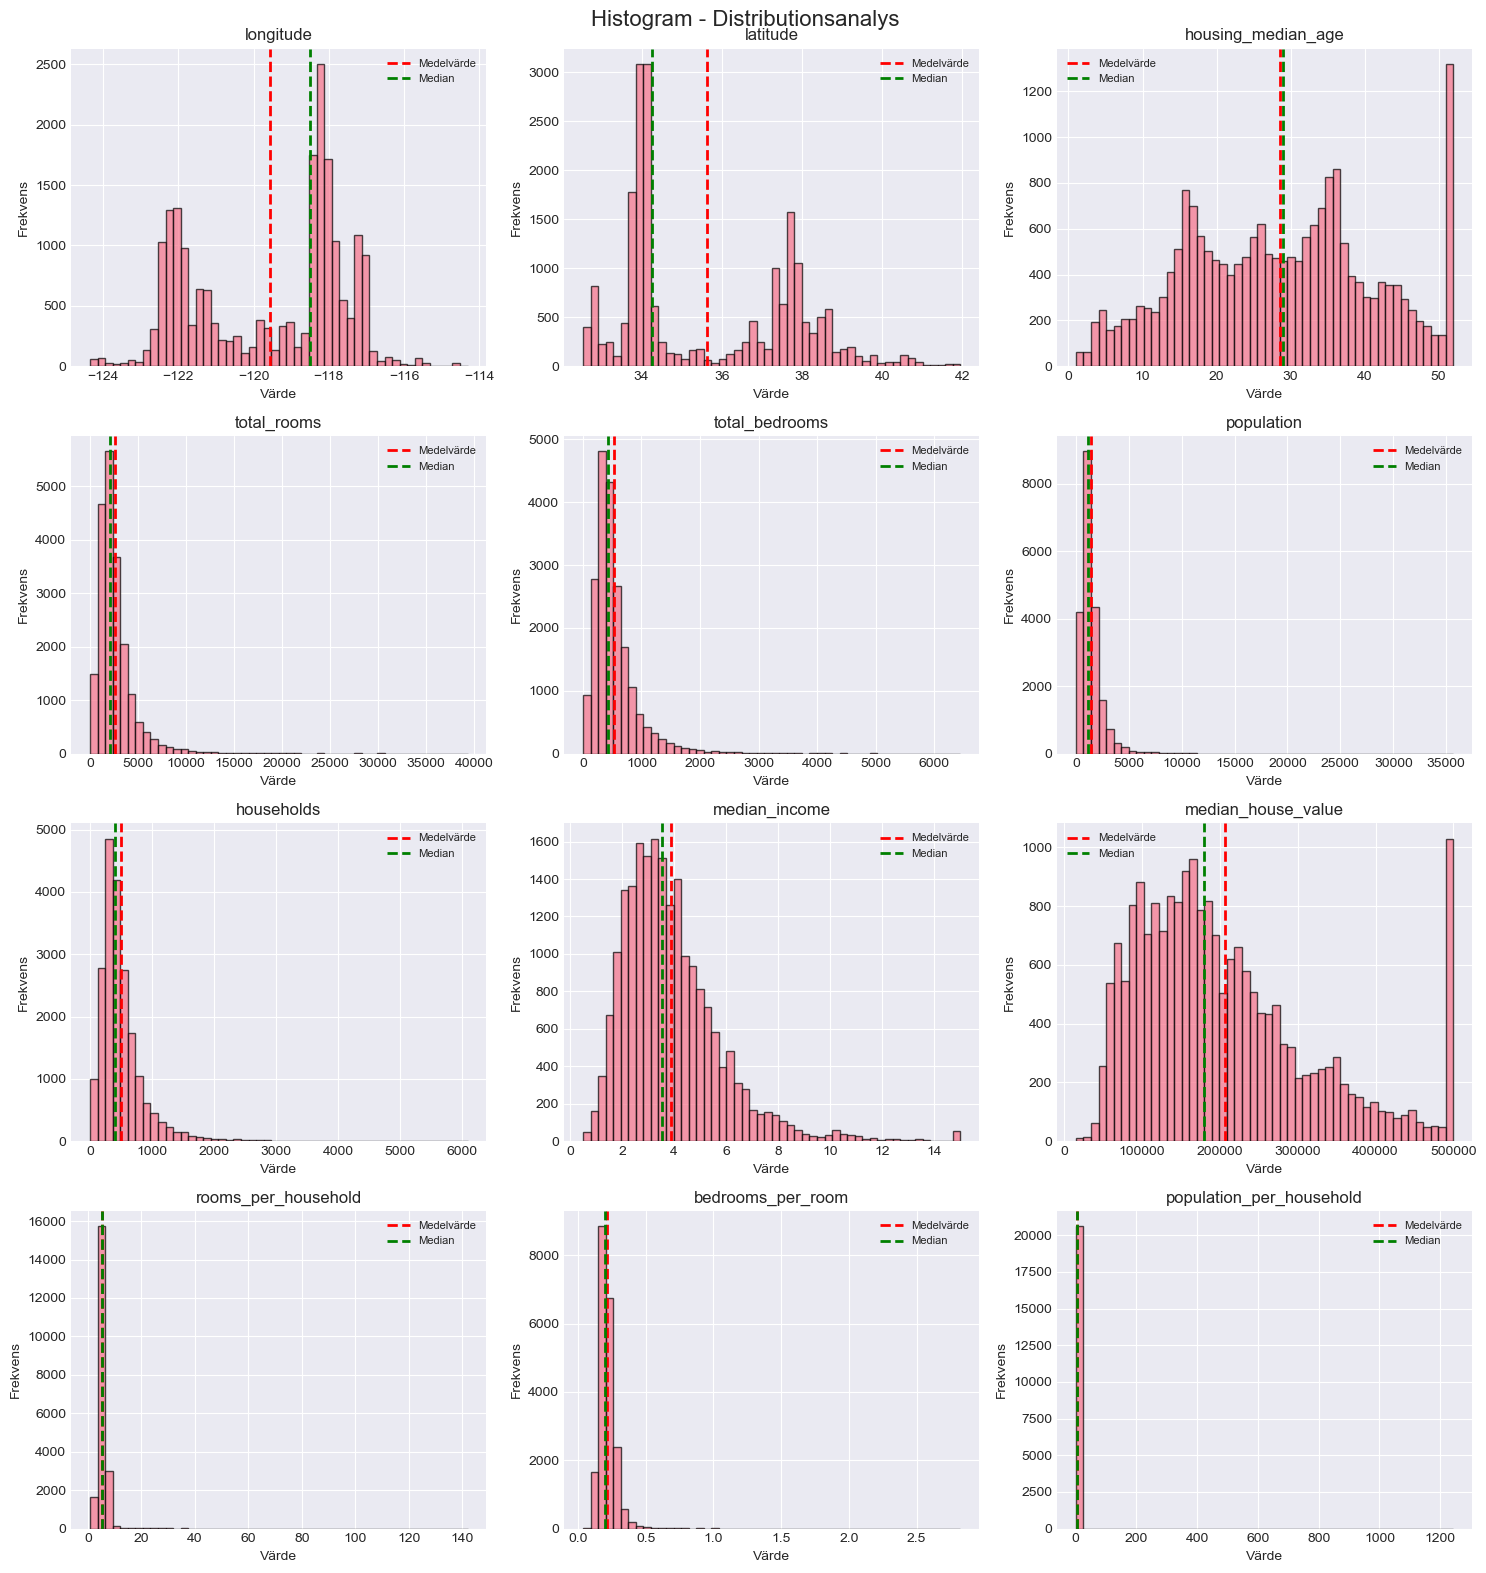


OUTLIER-DETEKTION


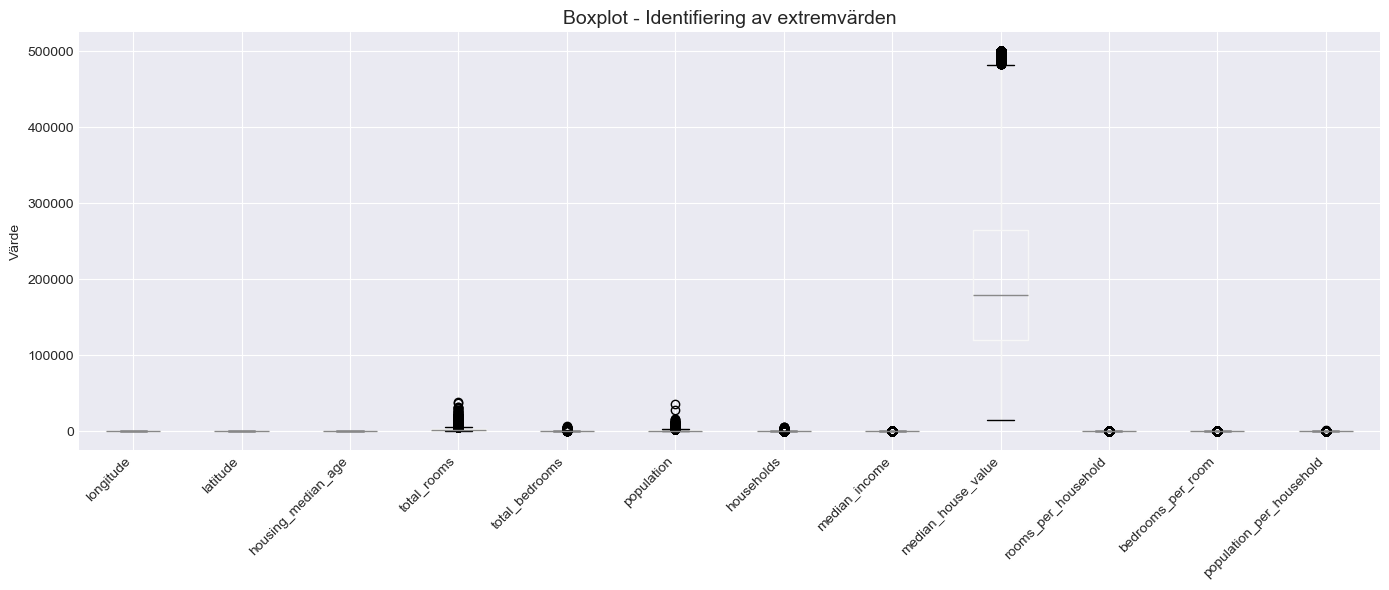


Antal outliers per variabel (IQR-metod):
  total_rooms                   :  1287 ( 6.24%)
  total_bedrooms                :  1306 ( 6.33%)
  population                    :  1196 ( 5.79%)
  households                    :  1220 ( 5.91%)
  median_income                 :   681 ( 3.30%)
  median_house_value            :  1071 ( 5.19%)
  rooms_per_household           :   511 ( 2.48%)
  bedrooms_per_room             :   635 ( 3.08%)
  population_per_household      :   711 ( 3.44%)

KORRELATIONSANALYS


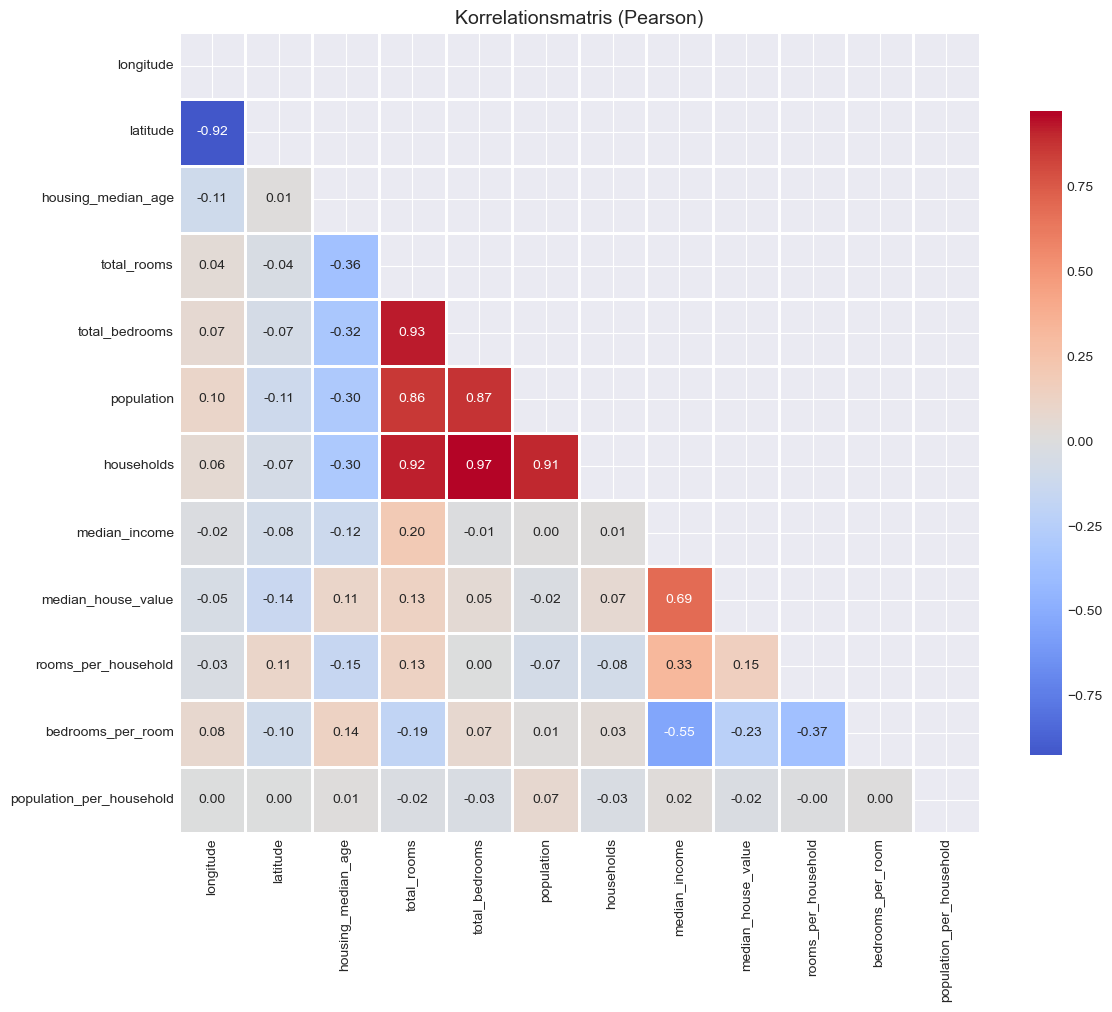


Starka korrelationer med målvariabeln (median_house_value):
  median_income                 :  0.688

MULTIVARIATE ANALYS - SAMBAND MELLAN VARIABLER
Skapar pairplot för: median_income, median_house_value, housing_median_age, rooms_per_household, population_per_household
(Detta kan ta någon minut...)


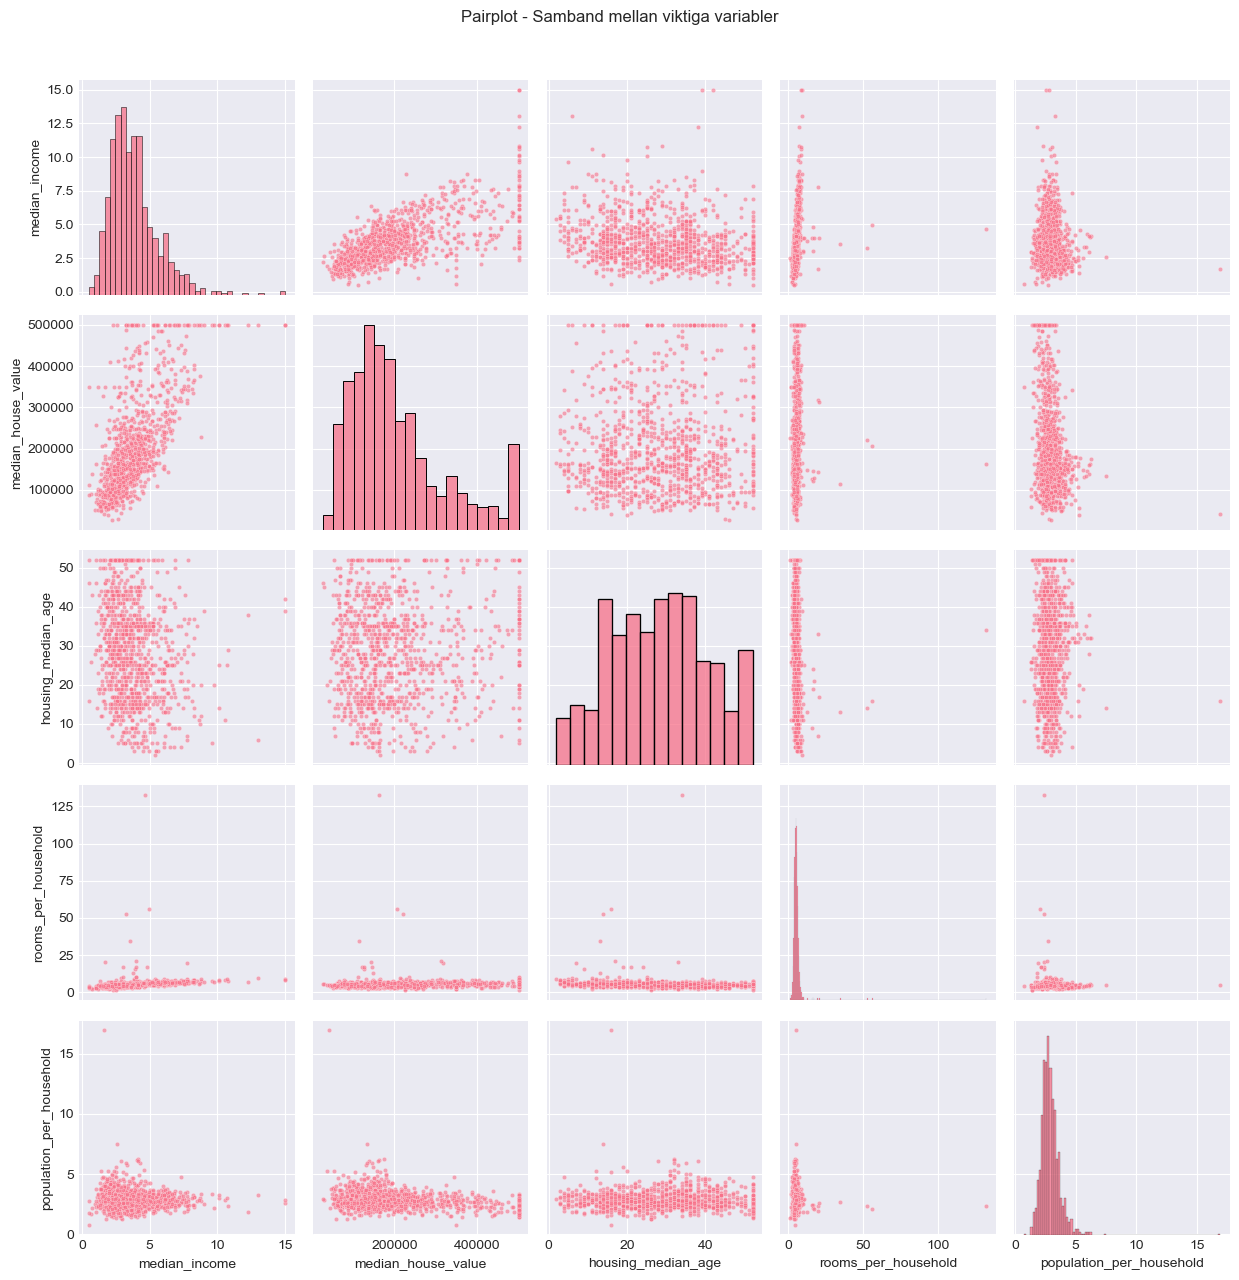


GEOGRAFISK ANALYS


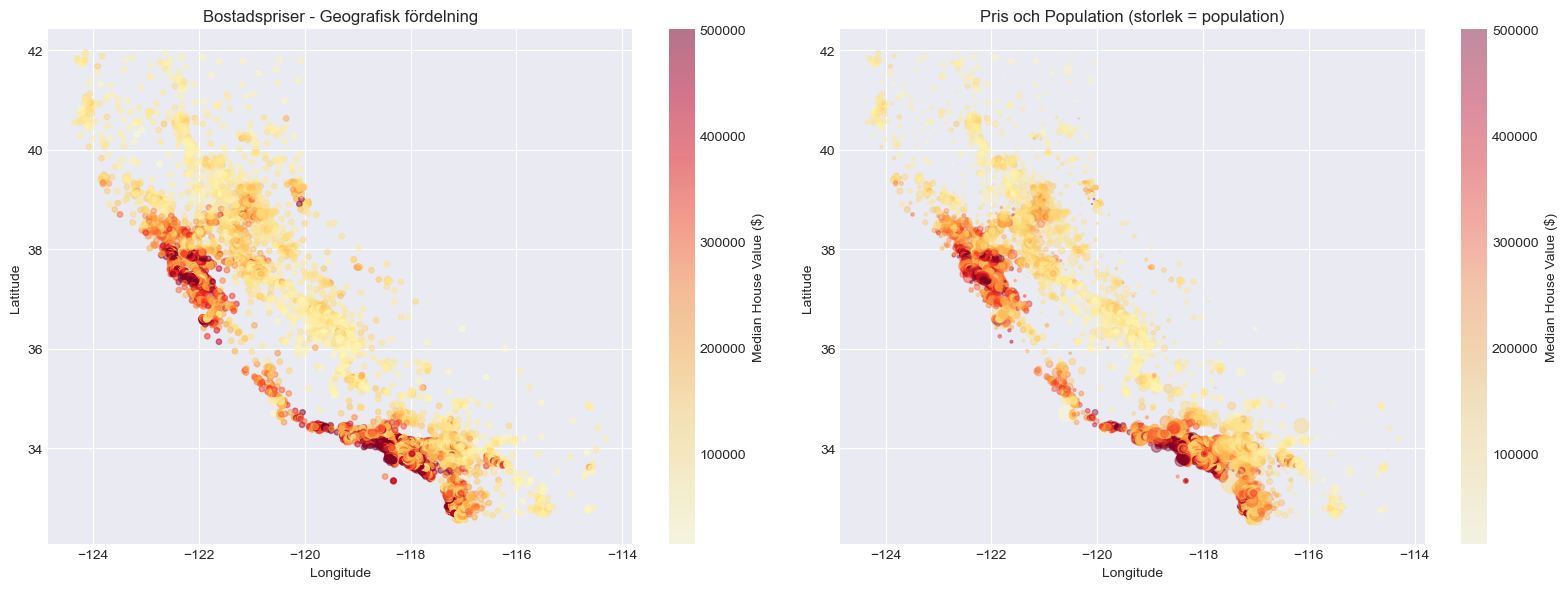

✓ Geografiska mönster identifierade
  → Kustområden (väster) har ofta högre priser
  → Storstadsområden (San Francisco, LA) syns tydligt

KATEGORISK ANALYS - OCEAN_PROXIMITY


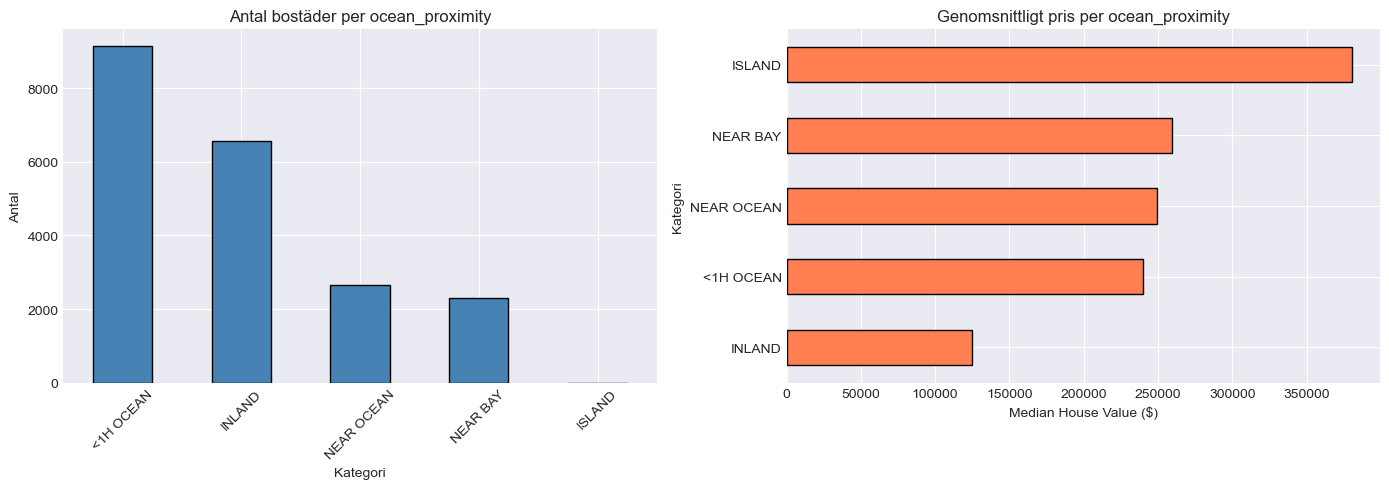


Prisstatistik per ocean_proximity:
                          mean    median  count
ocean_proximity                                
<1H OCEAN        240084.285464  214850.0   9136
INLAND           124805.392001  108500.0   6551
ISLAND           380440.000000  414700.0      5
NEAR BAY         259212.311790  233800.0   2290
NEAR OCEAN       249433.977427  229450.0   2658

DETALJERAD ANALYS AV MÅLVARIABELN: MEDIAN_HOUSE_VALUE
Medelvärde:    $206,855.82
Median:        $179,700.00
Std avvikelse: $115,395.62
Min:           $14,999.00
Max:           $500,001.00

Skewness: 0.98
  → Måttligt skev fördelning


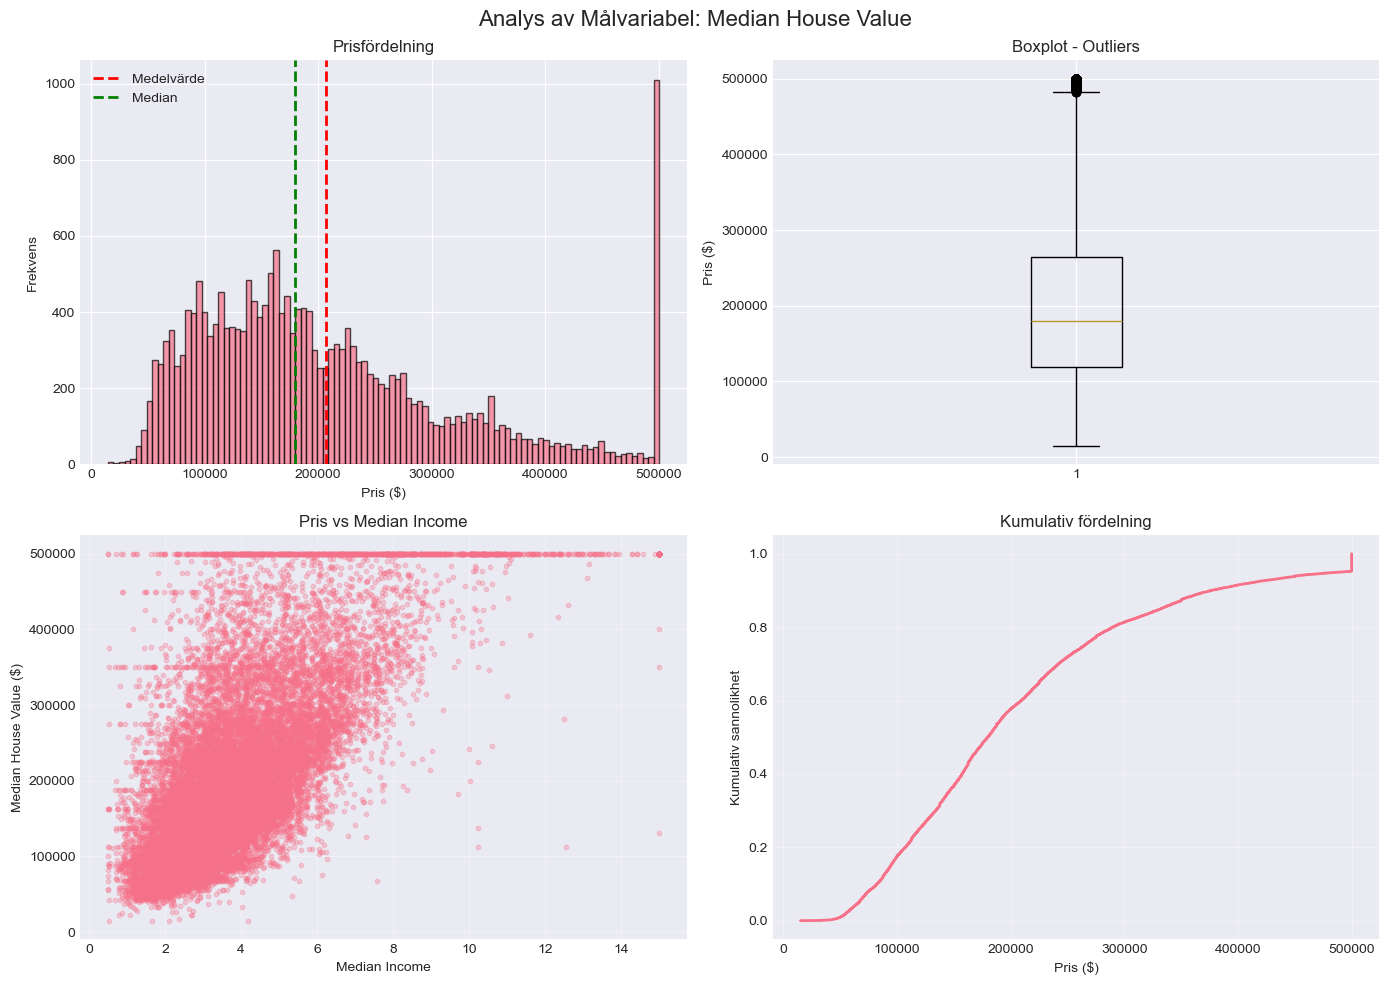


SAMMANFATTNING OCH VIKTIGA INSIKTER

 DATAÖVERSIKT:
  • Dataset: 20,640 rader × 13 kolumner
  • Numeriska variabler: 12
  • Kategoriska variabler: 1
  • Saknade värden: 0

 VIKTIGA FYND:
  • Starkaste prediktor: median_income (korrelation: 0.688)
  • Dyraste läge: ISLAND
  • Billigaste läge: INLAND
  • Skapade 3 nya features genom feature engineering

 REKOMMENDATIONER FÖR ML-MODELLERING:
  1. Använd feature engineering för bättre prestanda
  2. Överväg log-transformation för skeva variabler
  3. Hantera outliers (ta bort eller begränsa)
  4. Testa både linjära och icke-linjära modeller
  5. Använd geografisk position (longitude, latitude) som features
  6. One-hot encode kategoriska variabler (ocean_proximity)

 NÄSTA STEG:
  → Dela upp data i tränings- och testset (train_test_split)
  → Standardisera numeriska features (StandardScaler)
  → Träna ML-modeller (Linear Regression, Random Forest, XGBoost)
  → Utvärdera modeller (RMSE, R², MAE)
  → Hyperparameter-tuning

✓ EDA FÄRDIG - DU

In [1]:
# =========================================================
# EXPLORATORY DATA ANALYSIS (EDA)
# Housing Dataset - California
# Python Programmering och AI-utveckling
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Inställningar för  diagram
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")


# =========================================================
# 1. LADDA DATA
# =========================================================
print("=" * 70)
print("LADDAR OCH INSPEKTERAR DATA")
print("=" * 70)

# Läs in CSV-filen
df = pd.read_csv("housing.csv")
print(f"✓ Data inläst: {df.shape[0]} rader, {df.shape[1]} kolumner\n")

# Första intrycket av data
print("Första 5 raderna:")
print(df.head())

print("\nDatatyper:")
print(df.dtypes)

print("\nSnabb översikt:")
print(df.info())


# =========================================================
# 2. SAKNADE VÄRDEN
# =========================================================
print("\n" + "=" * 70)
print("ANALYS AV SAKNADE VÄRDEN")
print("=" * 70)

# VARFÖR: Saknade värden kan påverka modellens prestanda negativt
# Vi måste antingen fylla i dem eller ta bort raderna

missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Saknade": missing,
    "Procent": missing_percent
}).sort_values("Saknade", ascending=False)

print(missing_df[missing_df["Saknade"] > 0])

# STRATEGI: Fyll i saknade värden med median (robust mot outliers)
if 'total_bedrooms' in df.columns:
    saknade_bedrooms = df['total_bedrooms'].isnull().sum()
    if saknade_bedrooms > 0:
        df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
        print(f"\n✓ Fyllde {saknade_bedrooms} saknade värden i 'total_bedrooms' med median")


# =========================================================
# 3. BESKRIVANDE STATISTIK
# =========================================================
print("\n" + "=" * 70)
print("BESKRIVANDE STATISTIK")
print("=" * 70)

# VARFÖR: Ger oss en snabb förståelse för datans egenskaper
# - Centralmått (mean, median)
# - Spridningsmått (std, min, max)
# - Fördelning (quartiles)

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print("\nStatistik för numeriska variabler:")
print(df[numeric_cols].describe().round(2))

# Kategoriska variabler
categorical_cols = df.select_dtypes(include="object").columns.tolist()
if categorical_cols:
    print(f"\nKategoriska variabler: {categorical_cols}")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())


# =========================================================
# 4. FEATURE ENGINEERING
# =========================================================
print("\n" + "=" * 70)
print("FEATURE ENGINEERING")
print("=" * 70)





# Skapa nya features genom att kombinera befintliga
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

print("✓ Skapade nya features:")
print("  • rooms_per_household - Rum per hushåll")
print("  • bedrooms_per_room - Andel sovrum av totalt antal rum")
print("  • population_per_household - Personer per hushåll")

# Uppdatera listan med numeriska kolumner
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()


# =========================================================
# 5. DISTRIBUTIONSANALYS
# =========================================================
print("\n" + "=" * 70)
print("VISUALISERING AV DISTRIBUTIONER")
print("=" * 70)


n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_rows * n_cols > 1 else [axes]

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=50, edgecolor="black", alpha=0.7)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("Värde")
    axes[i].set_ylabel("Frekvens")
    
    # Lägg till medelvärde och median för jämförelse
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', 
                   linewidth=2, label='Medelvärde')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', 
                   linewidth=2, label='Median')
    axes[i].legend(fontsize=8)

# Ta bort tomma subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histogram - Distributionsanalys", fontsize=16)
plt.tight_layout()
plt.show()


# =========================================================
# 6. OUTLIER-DETEKTION
# =========================================================
print("\n" + "=" * 70)
print("OUTLIER-DETEKTION")
print("=" * 70)



# Boxplot - visuell outlier-detektion
plt.figure(figsize=(14, 6))
df[numeric_cols].boxplot()
plt.title("Boxplot - Identifiering av extremvärden", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Värde")
plt.tight_layout()
plt.show()

# IQR-metod för att räkna outliers
print("\nAntal outliers per variabel (IQR-metod):")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    percent = (outliers / len(df)) * 100
    
    if outliers > 0:
        print(f"  {col:30s}: {outliers:5d} ({percent:5.2f}%)")


# =========================================================
# 7. KORRELATIONSANALYS
# =========================================================
print("\n" + "=" * 70)
print("KORRELATIONSANALYS")
print("=" * 70)



corr_matrix = df[numeric_cols].corr()

# Heatmap - visuell korrelationsmatris
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Dölj övre triangeln
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", 
            cmap="coolwarm", center=0, square=True, 
            linewidths=1, cbar_kws={"shrink": 0.8})
plt.title("Korrelationsmatris (Pearson)", fontsize=14)
plt.tight_layout()
plt.show()

# Hitta starka korrelationer
print("\nStarka korrelationer med målvariabeln (median_house_value):")
if 'median_house_value' in corr_matrix.columns:
    target_corr = corr_matrix['median_house_value'].sort_values(ascending=False)
    for var, corr_val in target_corr.items():
        if var != 'median_house_value' and abs(corr_val) > 0.3:
            print(f"  {var:30s}: {corr_val:6.3f}")


# =========================================================
# 8. MULTIVARIATE ANALYS
# =========================================================
print("\n" + "=" * 70)
print("MULTIVARIATE ANALYS - SAMBAND MELLAN VARIABLER")
print("=" * 70)



# Välj de viktigaste variablerna för pairplot (annars blir det för rörigt)
important_vars = ['median_income', 'median_house_value', 'housing_median_age', 
                  'rooms_per_household', 'population_per_household']
available_vars = [v for v in important_vars if v in df.columns]

if len(available_vars) >= 3:
    print(f"Skapar pairplot för: {', '.join(available_vars)}")
    print("(Detta kan ta någon minut...)")
    
    sns.pairplot(df[available_vars].sample(n=min(1000, len(df))),  # Sample för snabbhet
                 diag_kind='hist', plot_kws={'alpha': 0.6, 's': 10})
    plt.suptitle("Pairplot - Samband mellan viktiga variabler", y=1.02)
    plt.tight_layout()
    plt.show()


# =========================================================
# 9. GEOGRAFISK ANALYS
# =========================================================
print("\n" + "=" * 70)
print("GEOGRAFISK ANALYS")
print("=" * 70)



if all(col in df.columns for col in ['longitude', 'latitude', 'median_house_value']):
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Karta 1: Pris efter geografisk position
    scatter1 = axes[0].scatter(df['longitude'], df['latitude'], 
                              c=df['median_house_value'], 
                              cmap='YlOrRd', alpha=0.5, s=15)
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    axes[0].set_title('Bostadspriser - Geografisk fördelning')
    plt.colorbar(scatter1, ax=axes[0], label='Median House Value ($)')
    
    # Karta 2: Pris och population
    scatter2 = axes[1].scatter(df['longitude'], df['latitude'], 
                              c=df['median_house_value'], 
                              cmap='YlOrRd', alpha=0.4, 
                              s=df['population']/100)
    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')
    axes[1].set_title('Pris och Population (storlek = population)')
    plt.colorbar(scatter2, ax=axes[1], label='Median House Value ($)')
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Geografiska mönster identifierade")
    print("  → Kustområden (väster) har ofta högre priser")
    print("  → Storstadsområden (San Francisco, LA) syns tydligt")


# =========================================================
# 10. KATEGORISK ANALYS - OCEAN PROXIMITY
# =========================================================
print("\n" + "=" * 70)
print("KATEGORISK ANALYS - OCEAN_PROXIMITY")
print("=" * 70)

# Kategoriska variabler måste analyseras annorlunda än numeriska


if 'ocean_proximity' in df.columns and 'median_house_value' in df.columns:
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Fördelning av kategorier
    df['ocean_proximity'].value_counts().plot(kind='bar', ax=axes[0], 
                                              color='steelblue', edgecolor='black')
    axes[0].set_title('Antal bostäder per ocean_proximity')
    axes[0].set_ylabel('Antal')
    axes[0].set_xlabel('Kategori')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Genomsnittspris per kategori
    price_by_ocean = df.groupby('ocean_proximity')['median_house_value'].mean().sort_values()
    price_by_ocean.plot(kind='barh', ax=axes[1], color='coral', edgecolor='black')
    axes[1].set_title('Genomsnittligt pris per ocean_proximity')
    axes[1].set_xlabel('Median House Value ($)')
    axes[1].set_ylabel('Kategori')
    
    plt.tight_layout()
    plt.show()
    
    # Skriv ut statistik
    print("\nPrisstatistik per ocean_proximity:")
    print(df.groupby('ocean_proximity')['median_house_value'].agg(['mean', 'median', 'count']))


# =========================================================
# 11. ANALYS AV MÅLVARIABEL
# =========================================================
print("\n" + "=" * 70)
print("DETALJERAD ANALYS AV MÅLVARIABELN: MEDIAN_HOUSE_VALUE")
print("=" * 70)

# Målvariabeln (det vi vill predicera) måste förstås i detalj



if 'median_house_value' in df.columns:
    
    price = df['median_house_value']
    
    print(f"Medelvärde:    ${price.mean():,.2f}")
    print(f"Median:        ${price.median():,.2f}")
    print(f"Std avvikelse: ${price.std():,.2f}")
    print(f"Min:           ${price.min():,.2f}")
    print(f"Max:           ${price.max():,.2f}")
    
    # Skevhet (skewness): Mäter asymmetri i fördelningen
    # - Positiv skevhet: lång svans åt höger (många låga värden, få höga)
    # - Negativ skevhet: lång svans åt vänster (få låga värden, många höga)
    # - Nära 0: symmetrisk fördelning (idealiskt)
    skewness = price.skew()
    print(f"\nSkewness: {skewness:.2f}")
    if abs(skewness) > 1:
        print("  → Starkt skev fördelning - överväg log-transformation")
    elif abs(skewness) > 0.5:
        print("  → Måttligt skev fördelning")
    else:
        print("  → Relativt symmetrisk fördelning")
    
    # Visualiseringar
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Histogram
    axes[0, 0].hist(price, bins=100, edgecolor="black", alpha=0.7)
    axes[0, 0].axvline(price.mean(), color='red', linestyle='--', 
                      linewidth=2, label='Medelvärde')
    axes[0, 0].axvline(price.median(), color='green', linestyle='--', 
                      linewidth=2, label='Median')
    axes[0, 0].set_title('Prisfördelning')
    axes[0, 0].set_xlabel('Pris ($)')
    axes[0, 0].set_ylabel('Frekvens')
    axes[0, 0].legend()
    
    # Boxplot
    axes[0, 1].boxplot(price)
    axes[0, 1].set_title('Boxplot - Outliers')
    axes[0, 1].set_ylabel('Pris ($)')
    
    # Scatter: Pris vs Income (starkaste korrelationen)
    if 'median_income' in df.columns:
        axes[1, 0].scatter(df['median_income'], price, alpha=0.3, s=10)
        axes[1, 0].set_title('Pris vs Median Income')
        axes[1, 0].set_xlabel('Median Income')
        axes[1, 0].set_ylabel('Median House Value ($)')
        axes[1, 0].grid(True, alpha=0.3)
    
    # Kumulativ fördelning
    sorted_prices = np.sort(price)
    cumulative = np.arange(1, len(sorted_prices) + 1) / len(sorted_prices)
    axes[1, 1].plot(sorted_prices, cumulative, linewidth=2)
    axes[1, 1].set_title('Kumulativ fördelning')
    axes[1, 1].set_xlabel('Pris ($)')
    axes[1, 1].set_ylabel('Kumulativ sannolikhet')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.suptitle('Analys av Målvariabel: Median House Value', fontsize=16)
    plt.tight_layout()
    plt.show()


# =========================================================
# 12. SAMMANFATTNING OCH INSIKTER
# =========================================================
print("\n" + "=" * 70)
print("SAMMANFATTNING OCH VIKTIGA INSIKTER")
print("=" * 70)

print("\n DATAÖVERSIKT:")
print(f"  • Dataset: {df.shape[0]:,} rader × {df.shape[1]} kolumner")
print(f"  • Numeriska variabler: {len(numeric_cols)}")
print(f"  • Kategoriska variabler: {len(categorical_cols)}")
print(f"  • Saknade värden: {df.isnull().sum().sum()}")

print("\n VIKTIGA FYND:")
if 'median_house_value' in df.columns and 'median_income' in df.columns:
    corr_val = df['median_house_value'].corr(df['median_income'])
    print(f"  • Starkaste prediktor: median_income (korrelation: {corr_val:.3f})")

if 'ocean_proximity' in df.columns and 'median_house_value' in df.columns:
    best_loc = df.groupby('ocean_proximity')['median_house_value'].mean().idxmax()
    worst_loc = df.groupby('ocean_proximity')['median_house_value'].mean().idxmin()
    print(f"  • Dyraste läge: {best_loc}")
    print(f"  • Billigaste läge: {worst_loc}")

print(f"  • Skapade {3} nya features genom feature engineering")

print("\n REKOMMENDATIONER FÖR ML-MODELLERING:")
print("  1. Använd feature engineering för bättre prestanda")
print("  2. Överväg log-transformation för skeva variabler")
print("  3. Hantera outliers (ta bort eller begränsa)")
print("  4. Testa både linjära och icke-linjära modeller")
print("  5. Använd geografisk position (longitude, latitude) som features")
print("  6. One-hot encode kategoriska variabler (ocean_proximity)")

print("\n NÄSTA STEG:")
print("  → Dela upp data i tränings- och testset (train_test_split)")
print("  → Standardisera numeriska features (StandardScaler)")
print("  → Träna ML-modeller (Linear Regression, Random Forest, XGBoost)")
print("  → Utvärdera modeller (RMSE, R², MAE)")
print("  → Hyperparameter-tuning")

print("\n" + "=" * 70)
print("✓ EDA FÄRDIG - DU ÄR REDO FÖR MODELLERING!")
print("=" * 70)